In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.layers import Flatten
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

Các hàm thực hiện phân loại:
- K nearest neighbors
- Support Vector Machine
- Decision Tree
- Random Forest
- Logistic Regression
- Neural Network

In [ ]:
#using KNN
def KNN(X_train, y_train, X_test, y_test, N):
  neigh=KNeighborsClassifier(n_neighbors=N)
  neigh.fit(X_train, y_train)
  y_predict=neigh.predict(X_test)
  return accuracy_score(y_test, y_predict), pd.crosstab(y_test, y_predict)

In [ ]:
#using SVM
def SVM(X_train, y_train, X_test, y_test, kernel):
  svm_model=svm.SVC(kernel=kernel)
  svm_model.fit(X_train, y_train)
  svm_y_predict=svm_model.predict(X_test)
  return accuracy_score(y_test, svm_y_predict), pd.crosstab(y_test, svm_y_predict)

In [ ]:
#using logisticregression
def LR(X_train, y_train, X_test, y_test):
  clf=LogisticRegression()
  clf.fit(X_train, y_train)
  y_predict=clf.predict(X_test)
  return accuracy_score(y_test, y_predict), pd.crosstab(y_test, y_predict)

In [ ]:
#using decision tree
def DT(X_train, y_train, X_test, y_test):
  clf=tree.DecisionTreeClassifier()
  clf=clf.fit(X_train, y_train)
  y_predict=clf.predict(X_test)
  return accuracy_score(y_test, y_predict), pd.crosstab(y_test, y_predict)

In [ ]:
#using random forest
def RF(X_train, y_train, X_test, y_test):
  #clf = make_classification(n_samples=10000, random_state=45)
  clf = RandomForestClassifier(n_estimators=20000, random_state=5)
  clf.fit(X_train, y_train)
  y_predict=clf.predict(X_test)
  return accuracy_score(y_test, y_predict), pd.crosstab(y_test, y_predict)

In [ ]:
#using Neural Network
from keras.models import Sequential
from keras.layers import Dense

def neuralnetwork(X_train, y_train, X_test, y_test, dim):
  model=Sequential()
  model.add(Dense(units=64, input_dim=dim, activation='relu'))
  model.add(Dense(units=32, activation='relu'))
  model.add(Dense(units=1,activation='sigmoid'))
  adam_optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=adam_optimizer
             ,loss='binary_crossentropy'
              ,metrics=['accuracy'])
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=32, epochs=150, verbose=1, callbacks=[callback])
  score = model.evaluate(X_test, y_test, verbose=0)
  return score, hist

In [ ]:
#vẽ biểu đồ
import matplotlib.pyplot as plt 
%matplotlib inline
def matplot(hist):
  history_dict=hist.history
  history_dict.keys()
  train=history_dict['accuracy']
  val=history_dict['val_accuracy']
  loss_values=history_dict['loss']
  val_loss_values=history_dict['val_loss']
  plt.plot(train, 'b', label='accuracy')
  plt.plot(val, 'r', label='Val_accuracy')
  plt.plot(loss_values, 'b', label='Training loss')
  plt.plot( val_loss_values, 'r', label='Validation loss')
  plt.title('accuracy and loss')
  plt.xlabel('Epochs')
  plt.ylabel('loss|accuracy')
  plt.show()

Axit Amin Composition

In [ ]:
#AAC
df_AAC_0=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/AAC_0.csv')
df_AAC_1=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/AAC_1.csv')
df_AAC=df_AAC_0.append(df_AAC_1, ignore_index=True)
df_AAC=df_AAC.drop(columns=['Unnamed: 0', 'id'])
df_AAC

,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V,label
0,0.0000,0.0714,0.0714,0.0714,0.0000,0.000,0.0000,0.0000,0.0000,0.1429,0.0000,0.0714,0.0000,0.0000,0.1429,0.2143,0.2143,0.0000,0.000,0.0000,0
1,0.0000,0.0769,0.0000,0.0769,0.0000,0.000,0.0769,0.0000,0.2308,0.0769,0.0769,0.1538,0.0000,0.0769,0.1538,0.0000,0.0000,0.0000,0.000,0.0000,0
2,0.1852,0.0370,0.0000,0.0000,0.0741,0.037,0.0370,0.1481,0.0741,0.0741,0.1481,0.0370,0.0000,0.0000,0.0370,0.0000,0.0000,0.0000,0.000,0.1111,0
3,0.0417,0.0000,0.0833,0.0417,0.0000,0.250,0.0833,0.0833,0.0000,0.0000,0.0417,0.0833,0.0417,0.0000,0.0833,0.0417,0.0417,0.0417,0.000,0.0417,0
4,0.0435,0.0000,0.0870,0.0870,0.0000,0.000,0.0870,0.0000,0.0435,0.0870,0.1304,0.1304,0.0435,0.0000,0.0000,0.0870,0.0870,0.0000,0.087,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,0.0625,0.0000,0.0000,0.0312,0.0000,0.000,0.0312,0.0938,0.0000,0.0625,0.0938,0.2500,0.0000,0.0625,0.0312,0.0938,0.0000,0.0000,0.000,0.1875,1
852,0.0500,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0500,0.0500,0.1500,0.3500,0.0000,0.1500,0.0000,0.1500,0.0000,0.0500,0.000,0.0000,1
853,0.0000,0.1154,0.0000,0.0000,0.0000,0.000,0.0000,0.0385,0.0385,0.0385,0.1923,0.2692,0.0000,0.1538,0.0769,0.0385,0.0000,0.0000,0.000,0.0385,1
854,0.0811,0.0541,0.0270,0.0270,0.0541,0.000,0.0000,0.1622,0.0000,0.0541,0.0811,0.1622,0.0270,0.0541,0.0000,0.0811,0.0270,0.0000,0.000,0.1081,1


In [ ]:
X=df_AAC.iloc[:, :-1]
y=df_AAC.label
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
score, hist = neuralnetwork(X_train, y_train, X_test, y_test, 20)
nn=[]
nn.append(score[1])
print(score)

Epoch 1/150
22/22 [==============================] - 1s 16ms/step - loss: 0.6911 - accuracy: 0.4848 - val_loss: 0.6707 - val_accuracy: 0.5872
Epoch 2/150
22/22 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.6216 - val_loss: 0.6333 - val_accuracy: 0.7849
Epoch 3/150
22/22 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.8330 - val_loss: 0.5662 - val_accuracy: 0.8372
Epoch 4/150
22/22 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.9111 - val_loss: 0.4812 - val_accuracy: 0.8605
Epoch 5/150
22/22 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.9182 - val_loss: 0.4002 - val_accuracy: 0.8663
Epoch 6/150
22/22 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.9156 - val_loss: 0.3453 - val_accuracy: 0.8721
Epoch 7/150
22/22 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9321 - val_loss: 0.3121 - val_accuracy: 0.8779
Epoch 8/150


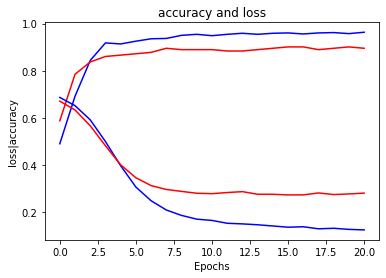

In [ ]:
matplot(hist)

In [ ]:
#using KNN
knn=[]
a, b= KNN(X_train, y_train, X_test, y_test, 3)
knn.append(a)
print(a)
print(b)

0.8837209302325582
col_0   0   1
label        
0      67  14
1       6  85


In [ ]:
#using SVM with kernel = rbf, linear, sigmoid
a, b = SVM(X_train, y_train, X_test, y_test, 'rbf')
svM=[]
svM.append(a)
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'linear')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(a)
print(b)

0.9186046511627907
col_0   0   1
label        
0      71  10
1       4  87
0.872093023255814
col_0   0   1
label        
0      70  11
1      11  80
0.7267441860465116
col_0   0   1
label        
0      57  24
1      23  68


In [ ]:
#using DT
dt=[]
a, b = DT(X_train, y_train, X_test, y_test)
dt.append(a)
print(a)
print(b)


0.813953488372093
col_0   0   1
label        
0      61  20
1      12  79


In [ ]:
#using logistic regression
lr=[]
a, b = LR(X_train, y_train, X_test, y_test)
lr.append(a)
print(a)
print(b)


0.8662790697674418
col_0   0   1
label        
0      71  10
1      13  78


In [ ]:
#using Random Forest
rf=[]
a, b = RF(X_train, y_train, X_test, y_test)
rf.append(a)
print(a)
print(b)


0.9244186046511628
col_0   0   1
label        
0      75   6
1       7  84


CTD: Composition-Transition-Distribution

In [ ]:
#C
df_C_0=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/C_0.csv')
df_C_1=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/C_1.csv')
df_C=df_C_0.append(df_C_1, ignore_index=True)
df_C=df_C.drop(columns=['Unnamed: 0', 'id'])
#df_C

In [ ]:
X=df_C.iloc[:, :-1]
y=df_C.label
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#using KNN
a, b = KNN(X_train, y_train, X_test, y_test, 2)
print(a)
print(b)
a, b = KNN(X_train, y_train, X_test, y_test, 5)
print(a)
print(b)

0.914396887159533
col_0    0    1
label          
0      109   10
1       12  126
0.8910505836575876
col_0   0    1
label         
0      99   20
1       8  130


In [ ]:
#using svm
a, b = SVM(X_train, y_train, X_test, y_test, 'rbf')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'linear')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(a)
print(b)

0.8949416342412452
col_0    0    1
label          
0      108   11
1       16  122
0.8638132295719845
col_0    0    1
label          
0      105   14
1       21  117
0.7237354085603113
col_0    0   1
label         
0      111   8
1       63  75


In [ ]:
#using Logistic Regression
a, b = LR(X_train, y_train, X_test, y_test)
print(a)
print(b)

0.8715953307392996
col_0    0    1
label          
0      107   12
1       21  117


In [ ]:
#using Decision Tree
a, b = DT(X_train, y_train, X_test, y_test)
print(a)
print(b)

0.8793774319066148
col_0    0    1
label          
0      102   17
1       14  124


In [ ]:
#using Random Forest
a, b = RF(X_train, y_train, X_test, y_test)
print(a)
print(b)

0.9182879377431906
col_0    0    1
label          
0      111    8
1       13  125


In [ ]:
df_T_0=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/T_0.csv')
df_T_1=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/T_1.csv')
df_T=df_T_0.append(df_T_1, ignore_index=True)
df_T=df_T.drop(columns=['Unnamed: 0', 'id'])
#df_T

In [ ]:
X=df_T.iloc[:, :-1]
y=df_T.label
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#using KNN
a, b = KNN(X_train, y_train, X_test, y_test, 2)
print(a)
print(b)
a, b = KNN(X_train, y_train, X_test, y_test, 5)
print(a)
print(b)

0.9299610894941635
col_0    0    1
label          
0      114    5
1       13  125
0.8832684824902723
col_0   0    1
label         
0      96   23
1       7  131


In [ ]:
#using svm
a, b = SVM(X_train, y_train, X_test, y_test, 'rbf')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'linear')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(a)
print(b)

0.9299610894941635
col_0    0    1
label          
0      107   12
1        6  132
0.914396887159533
col_0    0    1
label          
0      106   13
1        9  129
0.7042801556420234
col_0   0   1
label        
0      84  35
1      41  97


In [ ]:
#using Logistic Regression
a, b = LR(X_train, y_train, X_test, y_test)
print(a)
print(b)

0.9299610894941635
col_0    0    1
label          
0      108   11
1        7  131


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#using Decision Tree
a, b = DT(X_train, y_train, X_test, y_test)
print(a)
print(b)

0.8715953307392996
col_0   0    1
label         
0      99   20
1      13  125


In [ ]:
#using Random Forest
a, b = RF(X_train, y_train, X_test, y_test)
print(a)
print(b)

0.933852140077821
col_0    0    1
label          
0      109   10
1        7  131


In [ ]:
df_D_0=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/D_0.csv')
df_D_1=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/D_1.csv')
df_D=df_D_0.append(df_D_1, ignore_index=True)
df_D=df_D.drop(columns=['Unnamed: 0', 'id'])
#df_DD

In [ ]:
X=df_T.iloc[:, :-1]
y=df_T.label
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#using KNN
a, b = KNN(X_train, y_train, X_test, y_test, 2)
print(a)
print(b)
a, b = KNN(X_train, y_train, X_test, y_test, 5)
print(a)
print(b)

0.9299610894941635
col_0    0    1
label          
0      114    5
1       13  125
0.8832684824902723
col_0   0    1
label         
0      96   23
1       7  131


In [ ]:
#using svm
a, b = SVM(X_train, y_train, X_test, y_test, 'rbf')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'linear')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(a)
print(b)

0.9299610894941635
col_0    0    1
label          
0      107   12
1        6  132
0.914396887159533
col_0    0    1
label          
0      106   13
1        9  129
0.7042801556420234
col_0   0   1
label        
0      84  35
1      41  97


In [ ]:
#using Logistic Regression
a, b = LR(X_train, y_train, X_test, y_test)
print(a)
print(b)

0.9299610894941635
col_0    0    1
label          
0      108   11
1        7  131


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#using Decision Tree
a, b = DT(X_train, y_train, X_test, y_test)
print(a)
print(b)

0.8599221789883269
col_0   0    1
label         
0      97   22
1      14  124


In [ ]:
#using Random Forest
a, b = RF(X_train, y_train, X_test, y_test)
print(a)
print(b)

0.933852140077821
col_0    0    1
label          
0      109   10
1        7  131


In [ ]:
#ghép C, T, D thành 1 bảng duy nhất
df_CTD_0=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/CTD_0.csv')
df_CTD_1=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/CTD_1.csv')
df_CTD=df_CTD_0.append(df_CTD_1, ignore_index=True)
df_CTD=df_CTD.drop(columns=['Unnamed: 0', 'id'])
df_CTD

,CTD_HB1,CTD_NV1,CTD_PO1,CTD_PZ1,CTD_CH1,CTD_SS1,CTD_SA1,CTD_HB2,CTD_NV2,CTD_PO2,CTD_PZ2,CTD_CH2,CTD_SS2,CTD_SA2,CTD_HB3,CTD_NV3,CTD_PO3,CTD_PZ3,CTD_CH3,CTD_SS3,CTD_SA3,CTD_11_HB,CTD_11_NV,CTD_11_PO,CTD_11_PZ,CTD_11_CH,CTD_11_SS,CTD_11_SA,CTD_12_HB,CTD_12_NV,CTD_12_PO,CTD_12_PZ,CTD_12_CH,CTD_12_SS,CTD_12_SA,CTD_13_HB,CTD_13_NV,CTD_13_PO,CTD_13_PZ,CTD_13_CH,...,CTD_75_NV1,CTD_75_NV2,CTD_75_NV3,CTD_75_PO1,CTD_75_PO2,CTD_75_PO3,CTD_75_PZ1,CTD_75_PZ2,CTD_75_PZ3,CTD_75_CH1,CTD_75_CH2,CTD_75_CH3,CTD_75_SS1,CTD_75_SS2,CTD_75_SS3,CTD_75_SA1,CTD_75_SA2,CTD_75_SA3,CTD_100_HB1,CTD_100_HB2,CTD_100_HB3,CTD_100_NV1,CTD_100_NV2,CTD_100_NV3,CTD_100_PO1,CTD_100_PO2,CTD_100_PO3,CTD_100_PZ1,CTD_100_PZ2,CTD_100_PZ3,CTD_100_CH1,CTD_100_CH2,CTD_100_CH3,CTD_100_SS1,CTD_100_SS2,CTD_100_SS3,CTD_100_SA1,CTD_100_SA2,CTD_100_SA3,label
0,0.2857,0.6429,0.1429,0.5000,0.1429,0.1429,0.1429,0.5714,0.2143,0.5714,0.3571,0.7857,0.3571,0.2857,0.1429,0.1429,0.2857,0.1429,0.0714,0.5000,0.5714,1,4,0,2,0,0,0,3,2,2,3,2,1,0,0,2,0,2,0,...,6.75,2.25,1.50,1.50,6.00,3.00,5.25,3.75,1.50,1.50,8.25,0.75,1.50,3.75,5.25,1.50,3.00,6.00,4.0,8.0,2.0,9.0,3.0,2.0,2.0,8.0,4.0,7.0,5.0,2.0,2.0,11.0,1.0,2.0,5.0,7.0,2.0,4.0,8.0,0
1,0.3846,0.2308,0.2308,0.0769,0.2308,0.6154,0.2308,0.3846,0.2308,0.1538,0.3846,0.6923,0.1538,0.3846,0.2308,0.5385,0.6154,0.5385,0.0769,0.2308,0.3846,1,0,0,0,0,5,0,2,0,0,0,3,1,2,1,2,3,0,0,...,2.25,2.25,5.25,2.25,1.50,6.00,0.75,3.75,5.25,2.25,6.75,0.75,6.00,1.50,2.25,2.25,3.75,3.75,5.0,5.0,3.0,3.0,3.0,7.0,3.0,2.0,8.0,1.0,5.0,7.0,3.0,9.0,1.0,8.0,2.0,3.0,3.0,5.0,5.0,0
2,0.1481,0.3704,0.4074,0.3333,0.0741,0.5556,0.7407,0.4444,0.4074,0.3704,0.5185,0.8889,0.2593,0.1481,0.4074,0.1481,0.2222,0.1481,0.0370,0.1852,0.1111,1,4,2,4,0,8,15,0,4,5,5,1,5,1,3,0,3,0,0,...,7.50,8.25,3.00,8.25,7.50,4.50,6.75,10.50,3.00,1.50,18.00,0.75,11.25,5.25,3.75,15.00,3.00,2.25,4.0,12.0,11.0,10.0,11.0,4.0,11.0,10.0,6.0,9.0,14.0,4.0,2.0,24.0,1.0,15.0,7.0,5.0,20.0,4.0,3.0,0
3,0.5417,0.3333,0.1667,0.2500,0.0833,0.5417,0.2500,0.2917,0.5000,0.2917,0.5833,0.6250,0.1250,0.5417,0.1667,0.1667,0.5417,0.1667,0.2917,0.3333,0.2083,7,3,0,3,0,7,2,3,5,1,3,2,2,1,3,0,2,0,1,...,6.00,9.00,3.00,3.00,5.25,9.75,4.50,10.50,3.00,1.50,11.25,5.25,9.75,2.25,6.00,4.50,9.75,3.75,13.0,7.0,4.0,8.0,12.0,4.0,4.0,7.0,13.0,6.0,14.0,4.0,2.0,15.0,7.0,13.0,3.0,8.0,6.0,13.0,5.0,0
4,0.3913,0.3043,0.3478,0.3043,0.1304,0.4783,0.2609,0.3478,0.3913,0.2174,0.3913,0.7826,0.2609,0.3913,0.2609,0.3043,0.4348,0.3043,0.0870,0.2609,0.3478,3,1,0,1,0,2,0,1,3,3,3,3,3,2,5,2,5,2,0,...,5.25,6.75,5.25,6.00,3.75,7.50,5.25,6.75,5.25,2.25,13.50,1.50,8.25,4.50,4.50,4.50,6.75,6.00,9.0,8.0,6.0,7.0,9.0,7.0,8.0,5.0,10.0,7.0,9.0,7.0,3.0,18.0,2.0,11.0,6.0,6.0,6.0,9.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,0.3125,0.3125,0.4062,0.2812,0.2500,0.4375,0.5625,0.2812,0.3750,0.2812,0.4062,0.7188,0.3125,0.3125,0.4062,0.3125,0.3125,0.3125,0.0312,0.2500,0.1250,3,3,3,1,1,6,7,0,2,6,3,6,7,7,7,5,3,5,0,...,7.50,9.00,7.50,9.75,6.75,7.50,6.75,9.75,7.50,6.00,17.25,0.75,10.50,7.50,6.00,13.50,7.50,3.00,10.0,9.0,13.0,10.0,12.0,10.0,13.0,9.0,10.0,9.0,13.0,10.0,8.0,23.0,1.0,14.0,10.0,8.0,18.0,10.0,4.0,1
852,0.3500,0.2000,0.4000,0.2000,0.3500,0.6000,0.4500,0.2500,0.2000,0.2000,0.2000,0.6500,0.2500,0.3500,0.4000,0.6000,0.4000,0.6000,0.0000,0.1500,0.2000,2,1,3,1,2,6,3,1,0,1,0,4,3,3,4,3,3,3,0,...,3.00,3.00,9.00,6.00,3.00,6.00,3.00,3.00,9.00,5.25,9.75,0.00,9.00,3.75,2.25,6.75,5.25,3.00,7.0,5.0,8.0,4.0,4.0,12.0,8.0,4.0,8.0,4.0,4.0,12.0,7.0,13.0,0.0,12.0,5.0,3.0,9.0,7.0,4.0,1
853,0.3846,0.1538,0.4231,0.0769,0.3846,0.6154,0.4615,0.1923,0.2692,0.1538,0.3462,0.6154,0.2308,0.3846,0.4231,0.5769,0.4231,0.5769,0.0000,0.1538,0.1538,5,1,3,0,5,10,3,0,2,2,1,5,4,5,5,1,5,1,0,...,3.00,5.25,11.25,8.25,3.00,8.25,1.50,

In [ ]:
X=df_CTD.iloc[:, :-1]
y=df_CTD['label']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#using Neural Network
from keras.models import Sequential
from keras.layers import Dense

def deepneuralnetwork(X_train, y_train, X_test, y_test, dim):
  model=Sequential()
  model.add(Dense(units=64, input_dim=188, activation='relu'))
  model.add(Dense(units=32, activation='relu'))
  model.add(Dense(units=1,activation='sigmoid'))
  adam_optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=adam_optimizer
             ,loss='binary_crossentropy'
              ,metrics=['accuracy'])
  callback1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

  hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=150, verbose=1, callbacks = callback1)


  score = model.evaluate(X_test, y_test, verbose=0)
  return score, hist
score, hist = deepneuralnetwork(X_train, y_train, X_test, y_test, 188)
nn.append(score[1])
print(score)


Epoch 1/150
19/19 [==============================] - 1s 22ms/step - loss: 0.5589 - accuracy: 0.7584 - val_loss: 0.4604 - val_accuracy: 0.8132
Epoch 2/150
19/19 [==============================] - 0s 4ms/step - loss: 0.3753 - accuracy: 0.8991 - val_loss: 0.4087 - val_accuracy: 0.8560
Epoch 3/150
19/19 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.9008 - val_loss: 0.3731 - val_accuracy: 0.8482
Epoch 4/150
19/19 [==============================] - 0s 3ms/step - loss: 0.2892 - accuracy: 0.9215 - val_loss: 0.3604 - val_accuracy: 0.8482
Epoch 5/150
19/19 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.9024 - val_loss: 0.3513 - val_accuracy: 0.8482
Epoch 6/150
19/19 [==============================] - 0s 3ms/step - loss: 0.2837 - accuracy: 0.9017 - val_loss: 0.3342 - val_accuracy: 0.8444
Epoch 7/150
19/19 [==============================] - 0s 4ms/step - loss: 0.2721 - accuracy: 0.9140 - val_loss: 0.3400 - val_accuracy: 0.8521
Epoch 8/150


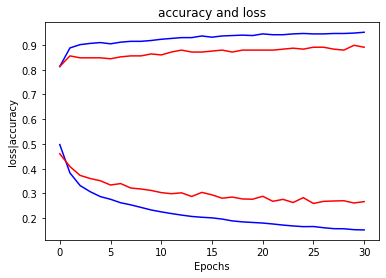

In [ ]:
matplot(hist)

In [ ]:
#using KNN
a, b = KNN(X_train, y_train, X_test, y_test, 2)
knn.append(a)
print(a)
print(b)
a, b = KNN(X_train, y_train, X_test, y_test, 5)
print(a)
print(b)

0.9221789883268483
col_0    0    1
label          
0      112    7
1       13  125
0.9027237354085603
col_0    0    1
label          
0      105   14
1       11  127


In [ ]:
#using svm
a, b = SVM(X_train, y_train, X_test, y_test, 'rbf')
svM.append(a)
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'linear')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(a)
print(b)

0.9221789883268483
col_0    0    1
label          
0      107   12
1        8  130
0.9260700389105059
col_0    0    1
label          
0      109   10
1        9  129
0.6575875486381323
col_0   0   1
label        
0      79  40
1      48  90


In [ ]:
#using Logistic Regression
a, b = LR(X_train, y_train, X_test, y_test)
lr.append(a)
print(a)
print(b)

0.9221789883268483
col_0    0    1
label          
0      107   12
1        8  130


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#using Decision Tree
a, b = DT(X_train, y_train, X_test, y_test)
dt.append(a)
print(a)
print(b)

0.9027237354085603
col_0    0    1
label          
0      105   14
1       11  127


In [ ]:
#using Random Forest
a, b = RF(X_train, y_train, X_test, y_test)
rf.append(a)
print(a)
print(b)

0.9455252918287937
col_0    0    1
label          
0      113    6
1        8  130


AXIT AMIN INDEX


In [ ]:
df_AAI_0=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/AAI_0.csv')
df_AAI_1=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/AAI_1.csv')
df_AAI=df_AAI_0.append(df_AAI_1, ignore_index=True)
df_AAI=df_AAI.drop(columns=['Unnamed: 0', 'id'])
df_AAI

,ANDN920101,ARGP820101,ARGP820102,ARGP820103,AURR980101,AURR980102,AURR980103,AURR980104,AURR980105,AURR980106,AURR980107,AURR980108,AURR980109,AURR980110,AURR980111,AURR980112,AURR980113,AURR980114,AURR980115,AURR980116,AURR980117,AURR980118,AURR980119,AURR980120,BAEK050101,BASU050101,BASU050102,BASU050103,BEGF750101,BEGF750102,BEGF750103,BHAR880101,BIGC670101,BIOV880101,BIOV880102,BLAM930101,BLAS910101,BROC820101,BROC820102,BULH740101,...,VASM830101,VASM830102,VASM830103,VELV850101,VENT840101,VHEG790101,VINM940101,VINM940102,VINM940103,VINM940104,WARP780101,WEBA780101,WERD780101,WERD780102,WERD780103,WERD780104,WILM950101,WILM950102,WILM950103,WILM950104,WIMW960101,WOEC730101,WOLR790101,WOLR810101,WOLS870101,WOLS870102,WOLS870103,YUTK870101,YUTK870102,YUTK870103,YUTK870104,ZASB820101,ZHOH040101,ZHOH040102,ZHOH040103,ZIMJ680101,ZIMJ680102,ZIMJ680103,ZIMJ680104,label
0,4.435714,0.472857,1.040714,0.985000,0.919286,0.920714,0.965714,1.109286,1.089286,0.924286,0.960714,0.960714,0.850714,1.030000,0.950714,0.968571,0.898571,0.865714,1.005000,1.064286,0.818571,0.900000,0.910000,0.734857,-0.011443,0.074136,0.075836,0.108307,0.499286,0.688571,0.772857,0.461286,78.400000,-18.857143,-33.857143,0.596429,0.378571,-0.142857,0.128571,-0.625714,...,0.155714,0.580357,0.163357,0.067248,0.142857,5.288571,1.009357,1.323357,1.008571,0.802143,6.987857,0.879286,0.509286,-0.067143,0.073571,-0.216429,0.416429,0.935000,1.343571,1.457143,3.978571,7.950000,-0.352857,-6.940714,1.190714,-0.441429,-0.290714,8.221429,6.842857,15.263571,15.522857,-0.176429,2.552857,2.753571,11.414286,0.828571,14.186429,15.622143,5.996429,0
1,4.408462,0.699231,0.780769,0.797692,0.994615,1.006154,0.933846,0.943846,0.900769,0.995385,0.960769,1.048462,1.154615,1.178462,1.043846,1.126154,1.118462,1.232308,1.260769,1.269231,1.155385,1.036923,1.036923,0.984615,-0.033392,0.060408,0.062154,0.071115,0.547692,0.659231,0.770769,0.455538,89.507692,-35.846154,-60.692308,0.618462,0.344385,-1.684615,-0.761538,-0.434615,...,0.198308,0.463769,0.199538,0.043259,0.076923,8.039231,1.028692,1.329231,1.013692,0.808846,6.340000,0.873077,0.480769,-0.093077,0.044615,-0.298462,-0.110769,-0.574615,0.130769,1.587692,3.900769,8.707692,-0.564615,-8.106923,1.710769,0.420000,-0.983846,7.815385,6.430769,15.233077,15.534615,-0.135462,2.533077,2.769231,10.184615,0.983846,14.143077,24.286923,7.166923,0
2,4.377407,1.262963,1.376667,1.534815,0.984074,1.002963,0.985185,0.867778,0.824074,0.939259,0.950741,1.149630,1.363704,1.251111,1.138519,1.211481,1.399259,1.328889,1.198148,1.129630,0.935926,1.073704,0.933333,0.895185,0.123804,0.219656,0.201596,0.228389,0.722963,0.825926,0.607407,0.391407,90.137037,66.148148,47.962963,0.755185,0.684370,5.637037,4.870370,-1.241852,...,0.162593,0.349296,0.334000,0.042420,0.407407,-6.952222,0.965556,1.276111,0.982778,0.790407,8.181481,0.767778,0.647037,-0.208519,0.157037,-0.121481,1.183333,1.740741,1.274815,1.033333,4.460741,6.437037,0.419630,-2.247037,-1.208519,-0.250000,-0.358519,10.885185,7.929630,17.458519,17.860000,-0.086667,3.555556,3.424444,15.855556,1.788148,16.061481,8.129259,6.340741,0
3,4.433333,0.749583,0.612500,0.712083,1.065417,1.044167,1.123750,1.052917,0.983333,0.971667,1.075000,0.879583,0.936250,0.862917,0.942500,0.958750,0.877500,0.942500,0.913333,1.094583,1.218750,1.094167,1.019583,1.044417,0.021546,0.076396,0.075629,0.125017,0.550833,0.755000,0.752083,0.432125,82.100000,8.916667,0.791667,0.438750,0.376167,-0.383333,1.425000,-0.557500,...,0.188250,0.367167,0.273875,0.041082,0.166667,4.043750,0.993583,1.311875,0.998458,0.793208,7.321250,0.838750,0.558333,-0.129583,0.020417,-0.320833,-0.136250,-0.026667,2.315417,0.137083,3.987917,8.208333,-0.298333,-6.713333,1.156667,0.079167,0.185417,9.066667,7.191667,16.592917,16.938750,-0.133125,2.559583,2.863750,11.450000,1.128333,13.870417,24.083333,6.317500,0
4,4.453913,0.782174,1.026957,1.113043,0.980870,1.025217,1.056957,1.107826,1.095217,1.045652,1.060870,1.066522,0.990435,1.010435,0.916522,1.075217,1.088261,0.956957,1.0278

In [ ]:
X=df_AAI.iloc[:, :-1]
y=df_AAI.label
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
score, hist = neuralnetwork(X_train, y_train, X_test, y_test,  552)
nn.append(score[1])
print(score)

Epoch 1/150
19/19 [==============================] - 1s 23ms/step - loss: 5.0612 - accuracy: 0.5421 - val_loss: 1.2745 - val_accuracy: 0.5914
Epoch 2/150
19/19 [==============================] - 0s 4ms/step - loss: 0.9262 - accuracy: 0.6430 - val_loss: 0.6116 - val_accuracy: 0.6732
Epoch 3/150
19/19 [==============================] - 0s 4ms/step - loss: 0.5791 - accuracy: 0.7370 - val_loss: 0.5184 - val_accuracy: 0.7549
Epoch 4/150
19/19 [==============================] - 0s 3ms/step - loss: 0.4677 - accuracy: 0.8014 - val_loss: 0.4825 - val_accuracy: 0.7899
Epoch 5/150
19/19 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.8373 - val_loss: 0.4454 - val_accuracy: 0.7938
Epoch 6/150
19/19 [==============================] - 0s 4ms/step - loss: 0.3939 - accuracy: 0.8341 - val_loss: 0.4100 - val_accuracy: 0.8288
Epoch 7/150
19/19 [==============================] - 0s 4ms/step - loss: 0.4118 - accuracy: 0.8115 - val_loss: 0.4431 - val_accuracy: 0.7665
Epoch 8/150


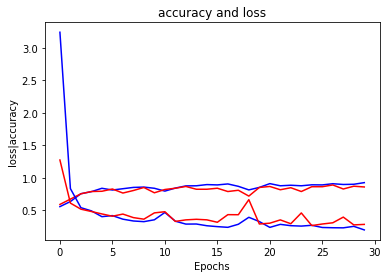

In [ ]:
matplot(hist)

In [ ]:
#using KNN
a, b = KNN(X_train, y_train, X_test, y_test, 2)
knn.append(a)
print(a)
print(b)
a, b = KNN(X_train, y_train, X_test, y_test, 5)
print(a)
print(b)

0.7898832684824902
col_0    0   1
label         
0      106  13
1       41  97
0.8054474708171206
col_0   0    1
label         
0      96   23
1      27  111


In [ ]:
#using svm
a, b = SVM(X_train, y_train, X_test, y_test, 'rbf')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'linear')
svM.append(a)
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(a)
print(b)

0.708171206225681
col_0    0   1
label         
0      102  17
1       58  80
0.9299610894941635
col_0    0    1
label          
0      109   10
1        8  130
0.6264591439688716
col_0   0   1
label        
0      99  20
1      76  62


In [ ]:
#using Logistic Regression
a, b = LR(X_train, y_train, X_test, y_test)
lr.append(a)
print(a)
print(b)

0.914396887159533
col_0    0    1
label          
0      107   12
1       10  128


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#using Decision Tree
a, b = DT(X_train, y_train, X_test, y_test)
dt.append(a)
print(a)
print(b)

0.8287937743190662
col_0    0    1
label          
0      100   19
1       25  113


In [ ]:
#using Random Forest
a, b = RF(X_train, y_train, X_test, y_test)
rf.append(a)
print(a)
print(b)

0.9260700389105059
col_0    0    1
label          
0      109   10
1        9  129


DIAXITAMIN PEPTIDE COMPOSITION 

In [ ]:
df_DPC_0=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/DPC_0.csv')
df_DPC_1=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/DPC_1.csv')
df_DPC=df_DPC_0.append(df_DPC_1, ignore_index=True)
df_DPC=df_DPC.drop(columns=['Unnamed: 0', 'id'])
df_DPC

,AA,AC,AD,AE,AF,AG,AH,AI,AK,AL,AM,AN,AP,AQ,AR,AS,AT,AV,AW,AY,CA,CC,CD,CE,CF,CG,CH,CI,CK,CL,CM,CN,CP,CQ,CR,CS,CT,CV,CW,CY,...,WC,WD,WE,WF,WG,WH,WI,WK,WL,WM,WN,WP,WQ,WR,WS,WT,WV,WW,WY,YA,YC,YD,YE,YF,YG,YH,YI,YK,YL,YM,YN,YP,YQ,YR,YS,YT,YV,YW,YY,label
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0385,0.0769,0.0,0.0,0.0,0.0000,0.0,0.0385,0.0000,0.0385,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0385,0.0,0.0000,0.0385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0435,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0455,0.0,0.0,0.0,0.0,0.0455,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0323,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1
852,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0526,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1
853,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1
854,0.0000,0.0000,0.0,0.0,0.0,0.0556,0.0,0.0000,0.0278,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0278,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
X=df_DPC.iloc[:, :-1]
y=df_DPC.label
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
score, hist = neuralnetwork(X_train, y_train, X_test, y_test, 400)
nn.append(score[1])
print(score)

Epoch 1/150
19/19 [==============================] - 1s 32ms/step - loss: 0.6903 - accuracy: 0.6319 - val_loss: 0.6809 - val_accuracy: 0.7276
Epoch 2/150
19/19 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.8055 - val_loss: 0.6487 - val_accuracy: 0.7821
Epoch 3/150
19/19 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.8805 - val_loss: 0.5803 - val_accuracy: 0.8521
Epoch 4/150
19/19 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.8900 - val_loss: 0.4699 - val_accuracy: 0.9027
Epoch 5/150
19/19 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.9458 - val_loss: 0.3651 - val_accuracy: 0.8988
Epoch 6/150
19/19 [==============================] - 0s 3ms/step - loss: 0.2802 - accuracy: 0.9451 - val_loss: 0.2765 - val_accuracy: 0.9144
Epoch 7/150
19/19 [==============================] - 0s 3ms/step - loss: 0.1896 - accuracy: 0.9752 - val_loss: 0.2338 - val_accuracy: 0.9183
Epoch 8/150


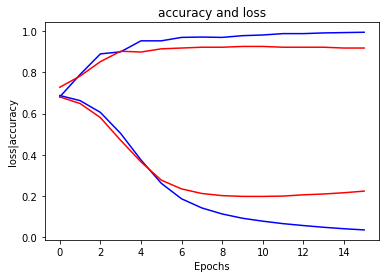

In [ ]:
matplot(hist)

In [ ]:
#using KNN
a, b = KNN(X_train, y_train, X_test, y_test, 2)
knn.append(a)
print(a)
print(b)
a, b = KNN(X_train, y_train, X_test, y_test, 5)
print(a)
print(b)

0.8560311284046692
col_0   0    1
label         
0      97   22
1      15  123
0.8404669260700389
col_0   0    1
label         
0      85   34
1       7  131


In [ ]:
#using svm
a, b = SVM(X_train, y_train, X_test, y_test, 'rbf')
svM.append(a)
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'linear')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(a)
print(b)

0.933852140077821
col_0    0    1
label          
0      111    8
1        9  129
0.8054474708171206
col_0    0   1
label         
0      116   3
1       47  91
0.8482490272373541
col_0   0    1
label         
0      95   24
1      15  123


In [ ]:
#using Logistic Regression
a, b = LR(X_train, y_train, X_test, y_test)
lr.append(a)
print(a)
print(b)

0.8132295719844358
col_0    0   1
label         
0      111   8
1       40  98


In [ ]:
#using Decision Tree
a, b = DT(X_train, y_train, X_test, y_test)
dt.append(a)
print(a)
print(b)

0.8054474708171206
col_0   0    1
label         
0      89   30
1      20  118


In [ ]:
#using Random Forest
a, b = RF(X_train, y_train, X_test, y_test)
rf.append(a)
print(a)
print(b)

0.9066147859922179
col_0    0    1
label          
0      107   12
1       12  126


GROUP AXITAMIN COMPOSITION

In [ ]:
df_GAC_0=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/GAC_0.csv')
df_GAC_1=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/GAC_1.csv')
df_GAC=df_GAC_0.append(df_GAC_1, ignore_index=True)
df_GAC=df_GAC.drop(columns=['Unnamed: 0', 'id'])
df_GAC

,GAC1,GAC2,GAC3,GAC4,GAC5,label
0,0.1429,0.0000,0.1429,0.0714,0.6429,0
1,0.1538,0.0769,0.4615,0.0769,0.2308,0
2,0.6667,0.0000,0.1481,0.0370,0.1481,0
3,0.2500,0.0417,0.0833,0.2917,0.3333,0
4,0.3043,0.0870,0.1739,0.0870,0.3478,0
...,...,...,...,...,...,...
851,0.5000,0.0625,0.2500,0.0312,0.1562,1
852,0.2500,0.2000,0.4000,0.0000,0.1500,1
853,0.3077,0.1538,0.4231,0.0000,0.1154,1
854,0.5135,0.0541,0.2162,0.0270,0.1892,1


In [ ]:
X=df_GAC.iloc[:, :-1]
y=df_GAC.label
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
score, hist = neuralnetwork(X_train, y_train, X_test, y_test, 5)
nn.append(score[1])
print(score)

Epoch 1/150
19/19 [==============================] - 1s 19ms/step - loss: 0.6999 - accuracy: 0.3737 - val_loss: 0.6827 - val_accuracy: 0.7626
Epoch 2/150
19/19 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.7806 - val_loss: 0.6635 - val_accuracy: 0.8171
Epoch 3/150
19/19 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.8467 - val_loss: 0.6356 - val_accuracy: 0.8054
Epoch 4/150
19/19 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.8638 - val_loss: 0.5997 - val_accuracy: 0.8132
Epoch 5/150
19/19 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.8337 - val_loss: 0.5609 - val_accuracy: 0.8016
Epoch 6/150
19/19 [==============================] - 0s 3ms/step - loss: 0.5347 - accuracy: 0.8117 - val_loss: 0.5169 - val_accuracy: 0.8171
Epoch 7/150
19/19 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.8559 - val_loss: 0.4819 - val_accuracy: 0.8210
Epoch 8/150


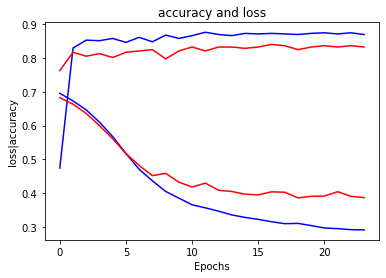

In [ ]:
matplot(hist)

In [ ]:
#using KNN
a, b = KNN(X_train, y_train, X_test, y_test, 2)
knn.append(a)
print(a)
print(b)
a, b = KNN(X_train, y_train, X_test, y_test, 5)
print(a)
print(b)

0.8365758754863813
col_0    0    1
label          
0      110    9
1       33  105
0.8754863813229572
col_0    0    1
label          
0      100   19
1       13  125


In [ ]:
#using svm
a, b = SVM(X_train, y_train, X_test, y_test, 'rbf')
svM.append(a)
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'linear')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(a)
print(b)

0.8404669260700389
col_0    0    1
label          
0      103   16
1       25  113
0.8326848249027238
col_0    0    1
label          
0      103   16
1       27  111
0.6770428015564203
col_0   0   1
label        
0      94  25
1      58  80


In [ ]:
#using Logistic Regression
a, b = LR(X_train, y_train, X_test, y_test)
lr.append(a)
print(a)
print(b)

0.8287937743190662
col_0    0    1
label          
0      103   16
1       28  110


In [ ]:
#using Decision Tree
a, b = DT(X_train, y_train, X_test, y_test)
dt.append(a)
print(a)
print(b)

0.8754863813229572
col_0    0    1
label          
0      106   13
1       19  119


In [ ]:
#using Random Forest
a, b = RF(X_train, y_train, X_test, y_test)
rf.append(a)
print(a)
print(b)

0.8949416342412452
col_0    0    1
label          
0      107   12
1       15  123


AXIT AMIN BINARY

In [ ]:
df_AAB_0=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/AAB_0.csv')
df_AAB_1=pd.read_csv('/content/gdrive/MyDrive/bioinformatics_baocao/data/AAB_1.csv')
df_AAB=df_AAB_0.append(df_AAB_1, ignore_index=True)
#df_AAB=df_AAB.drop(columns=['Unnamed: 0'])
df_AAB

,A1,C1,D1,E1,F1,G1,H1,I1,K1,L1,M1,N1,P1,Q1,R1,S1,T1,V1,W1,Y1,A2,C2,D2,E2,F2,G2,H2,I2,K2,L2,M2,N2,P2,Q2,R2,S2,T2,V2,W2,Y2,...,C5,D5,E5,F5,G5,H5,I5,K5,L5,M5,N5,P5,Q5,R5,S5,T5,V5,W5,Y5,A6,C6,D6,E6,F6,G6,H6,I6,K6,L6,M6,N6,P6,Q6,R6,S6,T6,V6,W6,Y6,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
850,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
851,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
852,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=df_AAB.iloc[:, :-1]
y=df_AAB.label
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
score, hist = neuralnetwork(X_train, y_train, X_test, y_test,  120)
nn.append(score[1])
print(score)

Epoch 1/150
19/19 [==============================] - 1s 24ms/step - loss: 0.6975 - accuracy: 0.5105 - val_loss: 0.6565 - val_accuracy: 0.7549
Epoch 2/150
19/19 [==============================] - 0s 4ms/step - loss: 0.6386 - accuracy: 0.8145 - val_loss: 0.6021 - val_accuracy: 0.8210
Epoch 3/150
19/19 [==============================] - 0s 4ms/step - loss: 0.5754 - accuracy: 0.8437 - val_loss: 0.5191 - val_accuracy: 0.8677
Epoch 4/150
19/19 [==============================] - 0s 4ms/step - loss: 0.4708 - accuracy: 0.9081 - val_loss: 0.4121 - val_accuracy: 0.8911
Epoch 5/150
19/19 [==============================] - 0s 4ms/step - loss: 0.3783 - accuracy: 0.8953 - val_loss: 0.3207 - val_accuracy: 0.9183
Epoch 6/150
19/19 [==============================] - 0s 4ms/step - loss: 0.2825 - accuracy: 0.9228 - val_loss: 0.2657 - val_accuracy: 0.9261
Epoch 7/150
19/19 [==============================] - 0s 4ms/step - loss: 0.2203 - accuracy: 0.9376 - val_loss: 0.2407 - val_accuracy: 0.9183
Epoch 8/150


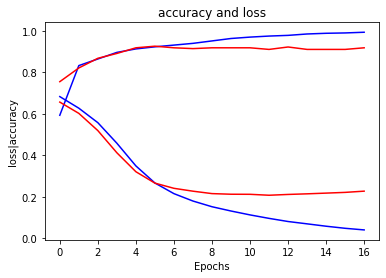

In [ ]:
matplot(hist)

In [ ]:
#using KNN
a, b = KNN(X_train, y_train, X_test, y_test, 2)
knn.append(a)
print(a)
print(b)
a, b = KNN(X_train, y_train, X_test, y_test, 5)
print(a)
print(b)

0.8832684824902723
col_0    0    1
label          
0      107   14
1       16  120
0.8482490272373541
col_0   0    1
label         
0      91   30
1       9  127


In [ ]:
#using svm
a, b = SVM(X_train, y_train, X_test, y_test, 'rbf')
svM.append(a)
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'linear')
print(a)
print(b)
a, b = SVM(X_train, y_train, X_test, y_test, 'sigmoid')
print(a)
print(b)

0.9221789883268483
col_0    0    1
label          
0      118    3
1       17  119
0.8832684824902723
col_0    0    1
label          
0      108   13
1       17  119
0.8871595330739299
col_0    0    1
label          
0      108   13
1       16  120


In [ ]:
#using Logistic Regression
a, b = LR(X_train, y_train, X_test, y_test)
lr.append(a)
print(a)
print(b)

0.9066147859922179
col_0    0    1
label          
0      112    9
1       15  121


In [ ]:
#using Decision Tree
a, b = DT(X_train, y_train, X_test, y_test)
dt.append(a)
print(a)
print(b)

0.8754863813229572
col_0    0    1
label          
0      109   12
1       20  116


In [ ]:
#using Random Forest
a, b = RF(X_train, y_train, X_test, y_test)
rf.append(a)
print(a)
print(b)

0.9182879377431906
col_0    0    1
label          
0      113    8
1       13  123


VẼ BIỂU ĐỒ 

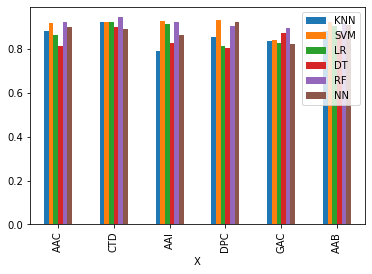

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(y, columns=["X", "KNN", "SVM", "LR", "DT", "RF", "NN"])
df['KNN'] = knn
df['SVM'] = svM
df['LR'] = lr
df['DT'] = dt
df['RF'] = rf
df['NN'] = nn

ax = df.plot(x="X", y=["KNN", "SVM", "LR", "DT", "RF", "NN"], kind="bar")
ax.set_xticklabels(('AAC', 'CTD', 'AAI', 'DPC', 'GAC', 'AAB'))
plt.show()